In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix
)
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
from sklearn.model_selection import learning_curve


 Data Types:
 Filename        object
Class Label      int64
f0             float64
f1             float64
f2             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 202, dtype: object

 Missing Values:
 Series([], dtype: int64)


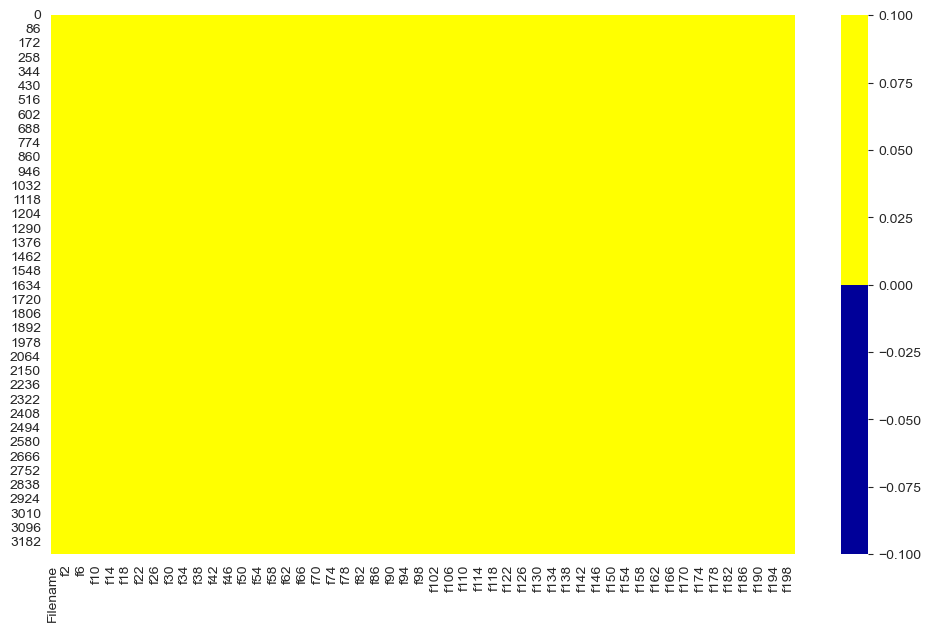

In [9]:
# A1
file_path = "Custom_CNN_Features.csv"  
df = pd.read_csv(file_path)

print("\n Data Types:\n", df.dtypes)

missing_values = df.isnull().sum()
print("\n Missing Values:\n", missing_values[missing_values > 0])

numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

import seaborn as sns
plt.figure(figsize=(12,7))
colours = ['#000099', '#ffff00'] #yellow is not missing. blue is missing.
sns.heatmap(df.isnull(),
            cmap = sns.color_palette(colours))
plt.show()

In [11]:
# identify columns with missing values
cols_with_missing = df.columns[df.isnull().any()]
# display columns with missing values
print(cols_with_missing)

Index([], dtype='object')


In [13]:
df.drop('Filename', axis = 1, inplace = True)

In [14]:
x = df.drop('Class Label', axis = 1)
y = df['Class Label']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2439, 200), (2439,), (814, 200), (814,))

In [17]:
print(y_train.value_counts())

Class Label
1    1258
0     767
2     414
Name: count, dtype: int64


In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [20]:
print(y_resampled.value_counts())

Class Label
1    1258
2    1258
0    1258
Name: count, dtype: int64


In [22]:
X = df.select_dtypes(include=[np.number])  # Select numerical columns only

# Calculate matrix rank
matrix_rank = np.linalg.matrix_rank(X)
print(f"Matrix Rank: {matrix_rank}")

Matrix Rank: 175


In [23]:
dep_cor = df.corr()
dep_cor

,Class Label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
Class Label,1.000000,0.463661,-0.722913,-0.780848,-0.746388,-0.595582,-0.757032,0.463535,NaN,0.480180,...,0.493343,0.003841,0.510298,0.484197,0.524550,-0.786789,-0.801463,-0.296790,-0.742889,0.116454
f0,0.463661,1.000000,-0.135262,-0.310323,-0.380149,-0.098776,-0.390284,0.693381,NaN,0.987769,...,0.985287,-0.005591,0.979486,0.987877,0.968715,-0.241574,-0.276247,-0.017810,-0.165086,0.885136
f1,-0.722913,-0.135262,1.000000,0.881897,0.744823,0.930110,0.739068,-0.332064,NaN,-0.177941,...,-0.192420,-0.006183,-0.228759,-0.182615,-0.260274,0.953695,0.935592,0.570506,0.971878,0.331528
f2,-0.780848,-0.310323,0.881897,1.000000,0.961333,0.841121,0.957453,-0.382068,NaN,-0.337815,...,-0.356969,-0.013145,-0.368850,-0.346241,-0.381648,0.948737,0.984923,0.511914,0.862041,0.119751
f3,-0.746388,-0.380149,0.744823,0.961333,1.000000,0.703499,0.993130,-0.306890,NaN,-0.396633,...,-0.411073,-0.017359,-0.405474,-0.404172,-0.406908,0.845233,0.916102,0.413386,0.737351,-0.008737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f195,-0.786789,-0.241574,0.953695,0.948737,0.845233,0.884773,0.836855,-0.426413,NaN,-0.266024,...,-0.285402,-0.008503,-0.316099,-0.273412,-0.339969,1.000000,0.978896,0.467266,0.956461,0.210231
f196,-0.801463,-0.276247,0.935592,0.984923,0.916102,0.857046,0.915204,-0.402051,NaN,-0.304497,...,-0.324047,-0.013734,-0.345407,-0.312529,-0.364808,0.978896,1.000000,0.502776,0.930145,0.170517
f197,-0.296790,-0.017810,0.570506,0.511914,0.413386,0.672960,0.422219,-0.129623,NaN,-0.070022,...,-0.075461,-0.004233,-0.089861,-0.071946,-0.101672,0.467266,0.502776,1.000000,0.435917,0.281530
f198,-0.742889,-0.165086,0.971878,0.862041,0.737351,0.850786,0.727451,-0.344302,NaN,-0.185647,...,-0.200284,-0.009149,-0.238299,-0.190830,-0.269656,0.956461,0.930145,0.435917,1.000000,0.283511


In [26]:
# Function to get data range
def get_data_range(df):
    data_range = pd.DataFrame({
        'Feature': df.columns,
        'Min': df.min(),
        'Max': df.max(),
        'Range': df.max() - df.min()
    })
    print("Data Range:")
    print(data_range)
    return data_range

In [28]:
from sklearn.preprocessing import MinMaxScaler


# Function to normalize data
def normalize_data(df, method='minmax'):
    if method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Method must be 'minmax' or 'standard'")
    
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    
    print(f"Data normalized using {method} scaling:")
    print(scaled_df.describe())
    return scaled_df

In [31]:
data_r = get_data_range(df)

Data Range:
                 Feature  Min          Max        Range
Class Label  Class Label  0.0     2.000000     2.000000
f0                    f0  0.0   781.789490   781.789490
f1                    f1  0.0   459.207794   459.207794
f2                    f2  0.0   536.879639   536.879639
f3                    f3  0.0   760.753845   760.753845
...                  ...  ...          ...          ...
f195                f195  0.0   750.316284   750.316284
f196                f196  0.0   571.680176   571.680176
f197                f197  0.0    31.048813    31.048813
f198                f198  0.0   505.643402   505.643402
f199                f199  0.0  1758.735840  1758.735840

[201 rows x 4 columns]


In [32]:
normalized_data = normalize_data(x, method='minmax')

Data normalized using minmax scaling:
                f0           f1           f2           f3           f4  \
count  3253.000000  3253.000000  3253.000000  3253.000000  3253.000000   
mean      0.022406     0.126128     0.210144     0.224553     0.086903   
std       0.070285     0.203986     0.179858     0.163670     0.175848   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.087521     0.112570     0.000000   
50%       0.000000     0.000000     0.173742     0.211154     0.000000   
75%       0.000000     0.256321     0.297749     0.326184     0.060025   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                f5           f6      f7           f8           f9  ...  \
count  3253.000000  3253.000000  3253.0  3253.000000  3253.000000  ...   
mean      0.241132     0.050626     0.0     0.021158     0.125387  ...   
std       0.168790     0.094297     0.0     0.072939     0.202199  ...   

In [33]:
normalized_data.drop('f7', axis = 1, inplace=True)

In [35]:
x = normalized_data
y = df['Class Label']

In [36]:
print(y_train.value_counts())

Class Label
1    1258
0     767
2     414
Name: count, dtype: int64


In [39]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [40]:
print(y_resampled.value_counts())

Class Label
1    1258
2    1258
0    1258
Name: count, dtype: int64


In [41]:
# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    end_time = time.time()
    duration = end_time - start_time
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='weighted') * 100
    recall = recall_score(y_test, y_pred, average='weighted') * 100
    f1 = f1_score(y_test, y_pred, average='weighted') * 100
    try:
        auroc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') * 100
    except AttributeError:
        auroc = "Not Available"
    
    # Print metrics
    print(f"{model_name} Results:")
    print(f"Time Taken: {duration:.2f} seconds")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1-Score: {f1:.2f}%")
    print(f"AUROC: {auroc}")
    print(classification_report(y_test, y_pred))
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

    # Learning Curve
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', 
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.plot(train_sizes, val_scores_mean, label="Validation Score", color="orange")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="green")

    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.title(f"Learning Curve for {model_name}")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

    return model

In [42]:
X_train = X_resampled
y_train = y_resampled

Logistic Regression Results:
Time Taken: 0.13 seconds
Accuracy: 92.51%
Precision: 92.61%
Recall: 92.51%
F1-Score: 92.52%
AUROC: 97.94294832086685
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       288
           1       0.92      0.92      0.92       376
           2       0.89      0.95      0.92       150

    accuracy                           0.93       814
   macro avg       0.92      0.93      0.92       814
weighted avg       0.93      0.93      0.93       814

Training set score: 0.9319
Test set score: 0.9251


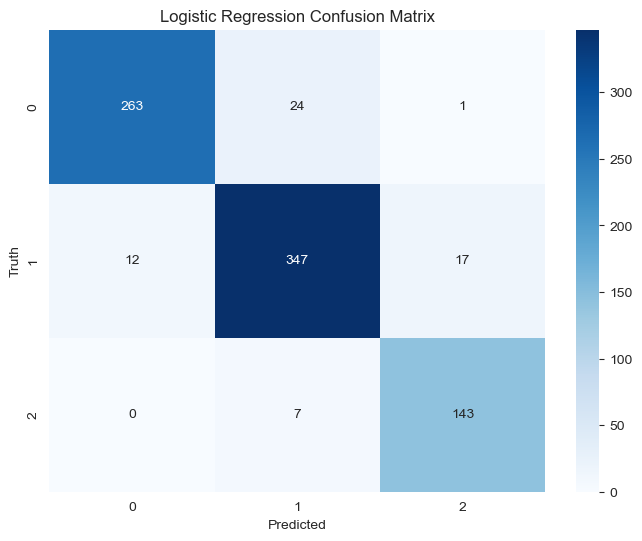

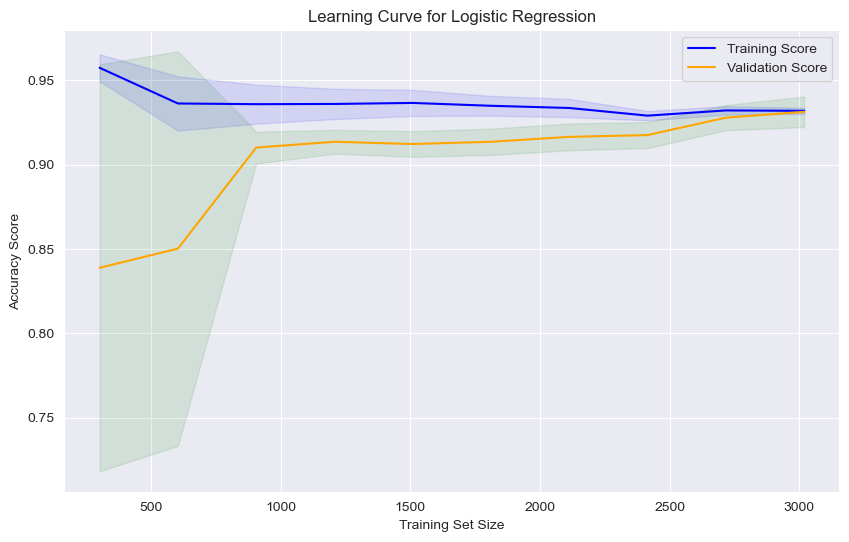

LogisticRegression(C=141747.41629268078)

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Logistic Regression with Grid Search
lr = LogisticRegression(max_iter=100)
param_grid_lr = {'C': np.logspace(-10, 50, num=100)}
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
lr_best = LogisticRegression(**grid_search_lr.best_params_, max_iter=100)
evaluate_model(lr_best, X_train, y_train, X_test, y_test, "Logistic Regression")

k-Nearest Neighbors Results:
Time Taken: 0.39 seconds
Accuracy: 91.52%
Precision: 91.52%
Recall: 91.52%
F1-Score: 91.51%
AUROC: 96.66139922690795
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       288
           1       0.91      0.91      0.91       376
           2       0.92      0.95      0.93       150

    accuracy                           0.92       814
   macro avg       0.92      0.92      0.92       814
weighted avg       0.92      0.92      0.92       814

Training set score: 0.9523
Test set score: 0.9152


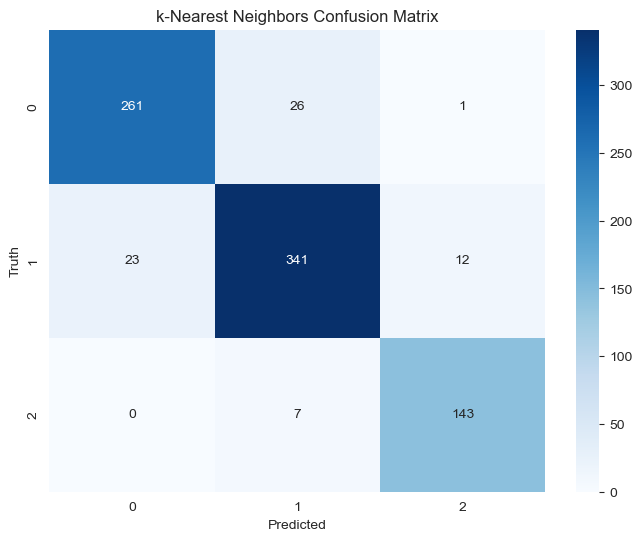

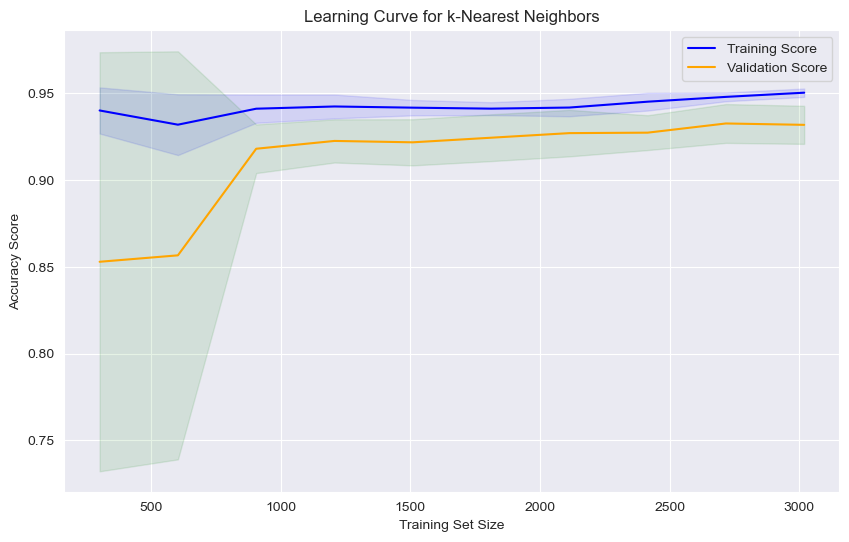

KNeighborsClassifier()

In [52]:
# kNN
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, X_train, y_train, X_test, y_test, "k-Nearest Neighbors")

Decision Tree Results:
Time Taken: 0.37 seconds
Accuracy: 89.19%
Precision: 89.24%
Recall: 89.19%
F1-Score: 89.18%
AUROC: 92.2063990733893
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       288
           1       0.91      0.86      0.88       376
           2       0.91      0.94      0.92       150

    accuracy                           0.89       814
   macro avg       0.89      0.90      0.90       814
weighted avg       0.89      0.89      0.89       814

Training set score: 1.0000
Test set score: 0.8919


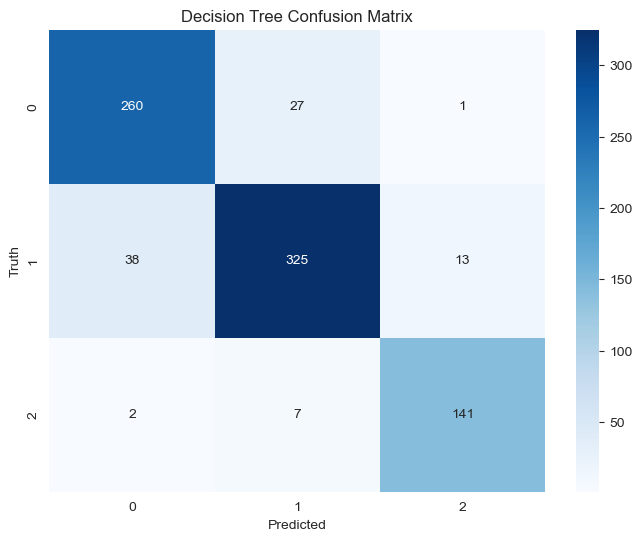

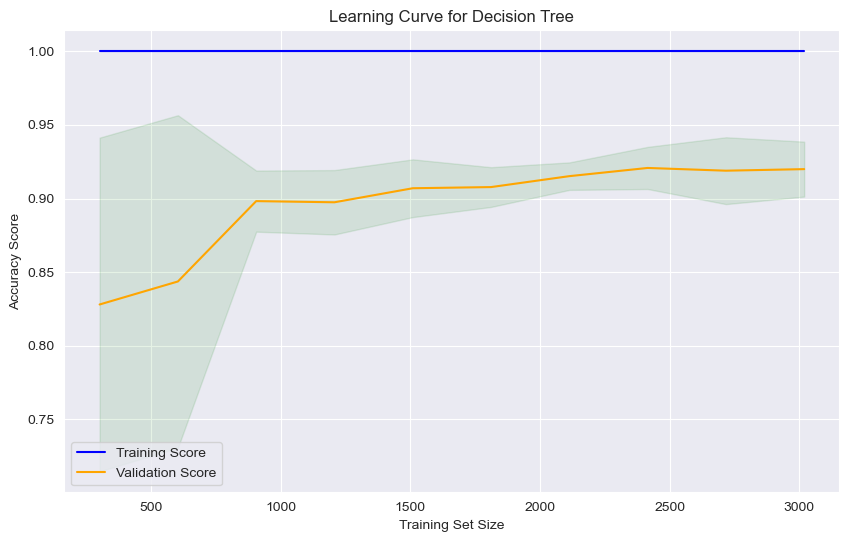

DecisionTreeClassifier()

In [53]:
# Decision Tree
dt = DecisionTreeClassifier()
evaluate_model(dt, X_train, y_train, X_test, y_test, "Decision Tree")

Support Vector Machines Results:
Time Taken: 4.09 seconds
Accuracy: 92.75%
Precision: 93.08%
Recall: 92.75%
F1-Score: 92.77%
AUROC: 98.14913285382893
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       288
           1       0.89      0.96      0.92       376
           2       1.00      0.89      0.94       150

    accuracy                           0.93       814
   macro avg       0.95      0.92      0.93       814
weighted avg       0.93      0.93      0.93       814

Training set score: 0.9120
Test set score: 0.9275


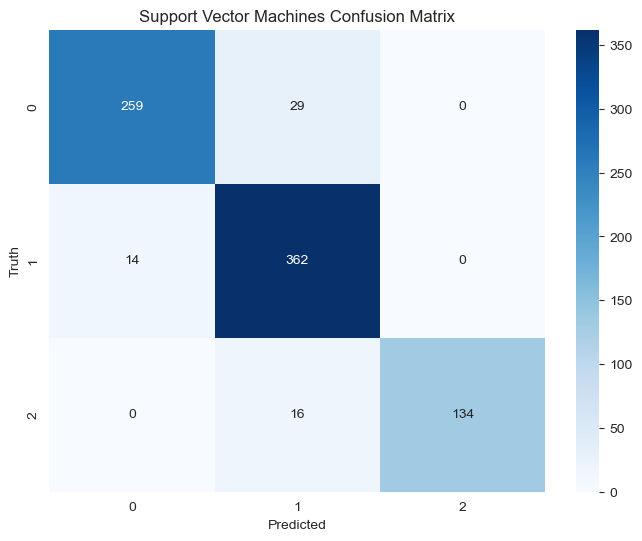

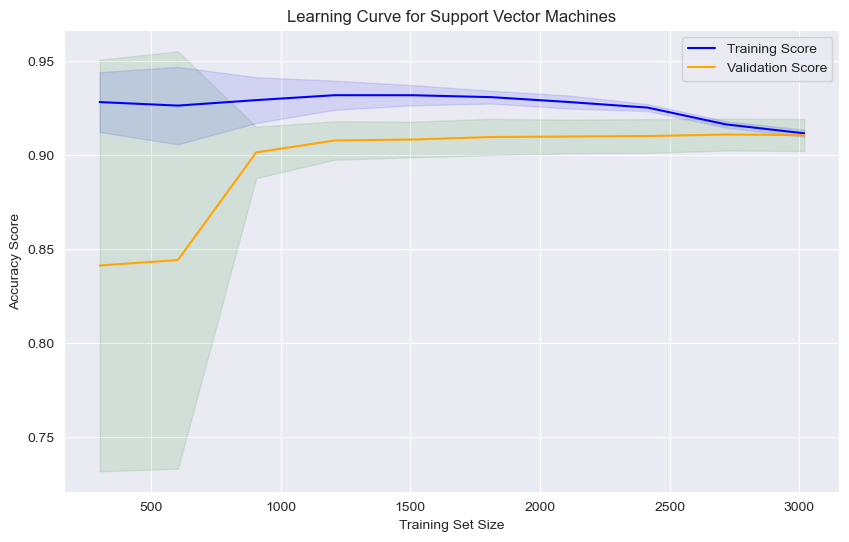

SVC(probability=True)

In [54]:
# Support Vector Machines
svm = SVC(probability=True)
evaluate_model(svm, X_train, y_train, X_test, y_test, "Support Vector Machines")

Random Forest Results:
Time Taken: 1.63 seconds
Accuracy: 93.49%
Precision: 93.53%
Recall: 93.49%
F1-Score: 93.49%
AUROC: 98.22995055499759
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       288
           1       0.92      0.95      0.93       376
           2       0.95      0.94      0.95       150

    accuracy                           0.93       814
   macro avg       0.94      0.93      0.94       814
weighted avg       0.94      0.93      0.93       814

Training set score: 1.0000
Test set score: 0.9349


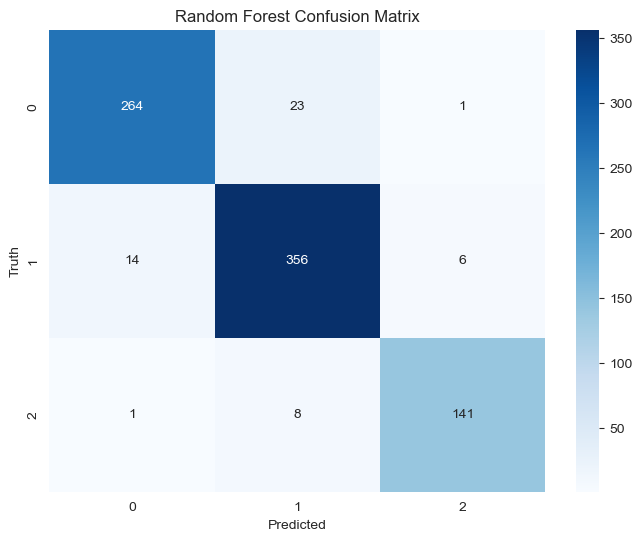

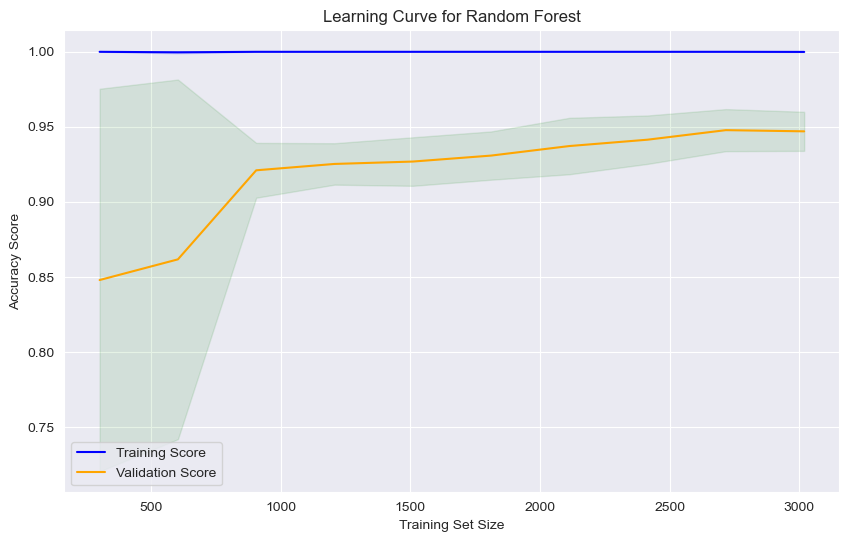

RandomForestClassifier()

In [55]:
# Random Forest
rf = RandomForestClassifier()
evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest")

Naïve Bayes Results:
Time Taken: 0.06 seconds
Accuracy: 92.75%
Precision: 92.92%
Recall: 92.75%
F1-Score: 92.77%
AUROC: 96.54136420294179
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       288
           1       0.90      0.95      0.92       376
           2       0.99      0.91      0.94       150

    accuracy                           0.93       814
   macro avg       0.94      0.92      0.93       814
weighted avg       0.93      0.93      0.93       814

Training set score: 0.9065
Test set score: 0.9275


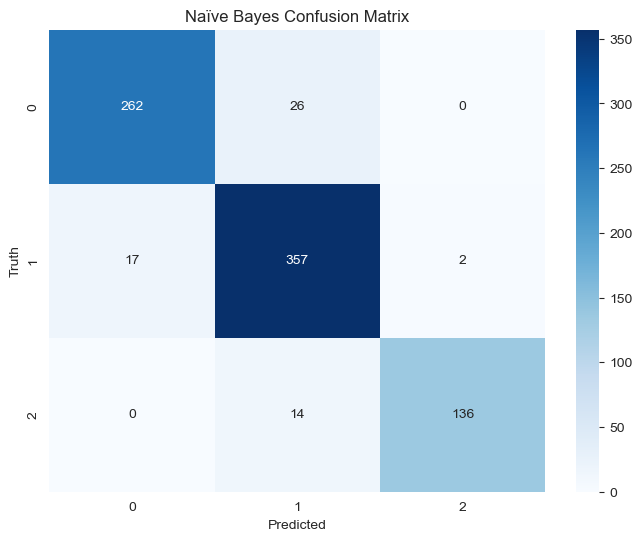

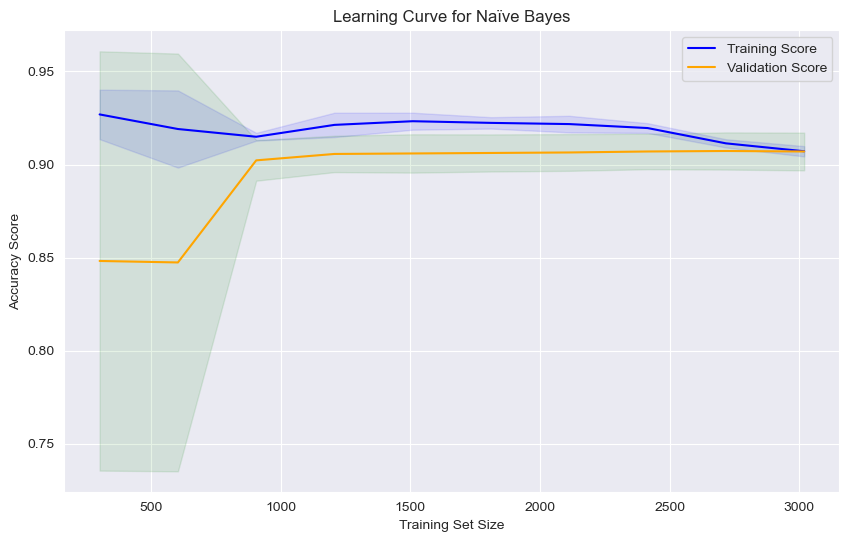

GaussianNB()

In [56]:
#Naïve Bayes
nb = GaussianNB()
evaluate_model(nb, X_train, y_train, X_test, y_test, "Naïve Bayes")